In [1]:
#Rocchio classification algorithm

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report\

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')

df['text'] = preprocess_text(df['text'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = NearestCentroid()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.88      0.95      0.91       101
entertainment       0.94      0.91      0.92        81
     politics       0.95      0.90      0.93        83
        sport       0.99      0.96      0.97        98
         tech       0.94      0.95      0.95        82

     accuracy                           0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



In [1]:
#DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')

df['text'] = preprocess_text(df['text'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), DecisionTreeClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.83
               precision    recall  f1-score   support

     business       0.79      0.80      0.80       101
entertainment       0.86      0.75      0.80        81
     politics       0.79      0.87      0.83        83
        sport       0.91      0.89      0.90        98
         tech       0.81      0.84      0.83        82

     accuracy                           0.83       445
    macro avg       0.83      0.83      0.83       445
 weighted avg       0.83      0.83      0.83       445



In [2]:
#MultinomialNB

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')

df['text'] = preprocess_text(df['text'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.97
               precision    recall  f1-score   support

     business       0.98      0.94      0.96       101
entertainment       1.00      0.91      0.95        81
     politics       0.92      0.99      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.94      0.99      0.96        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [3]:
#KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv',delimiter=',',encoding='latin-1')

df['text'] = preprocess_text(df['text'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), KNeighborsClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.67
               precision    recall  f1-score   support

     business       0.91      0.60      0.73       101
entertainment       0.91      0.53      0.67        81
     politics       0.86      0.78      0.82        83
        sport       0.43      1.00      0.60        98
         tech       1.00      0.35      0.52        82

     accuracy                           0.67       445
    macro avg       0.82      0.65      0.67       445
 weighted avg       0.81      0.67      0.67       445



In [4]:
#SVC

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv', delimiter=',', encoding='latin-1')

df['text'] = preprocess_text(df['text'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), SVC())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.95
               precision    recall  f1-score   support

     business       0.94      0.95      0.95       101
entertainment       0.96      0.94      0.95        81
     politics       0.95      0.94      0.95        83
        sport       1.00      0.98      0.99        98
         tech       0.91      0.95      0.93        82

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


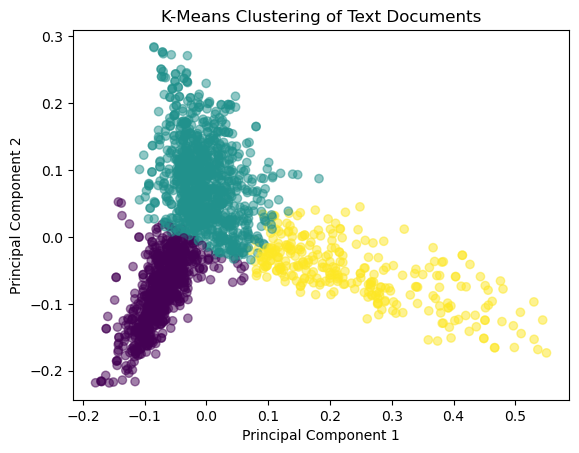

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv', delimiter=',', encoding='latin-1')

df['text'] = preprocess_text(df['text'])

k = 3

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
df['x'] = scatter_plot_points[:, 0]
df['y'] = scatter_plot_points[:, 1]

plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Text Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

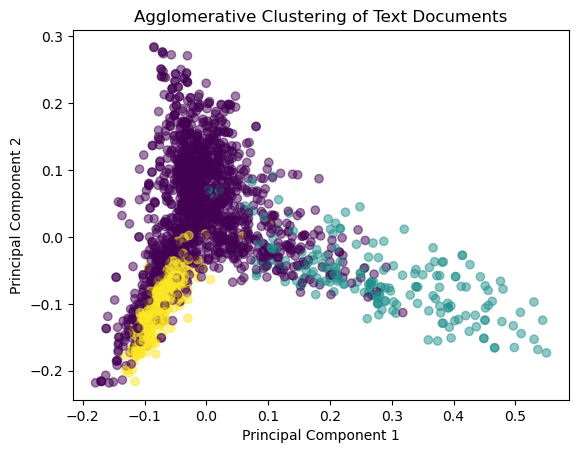

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv', delimiter=',', encoding='latin-1')

df['text'] = preprocess_text(df['text'])

n_clusters = 3

# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Step 2: Apply Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
df['cluster'] = agg_cluster.fit_predict(X.toarray())

# Step 3: Visualize the clusters (optional)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
df['x'] = scatter_plot_points[:, 0]
df['y'] = scatter_plot_points[:, 1]

plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering of Text Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\lovel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


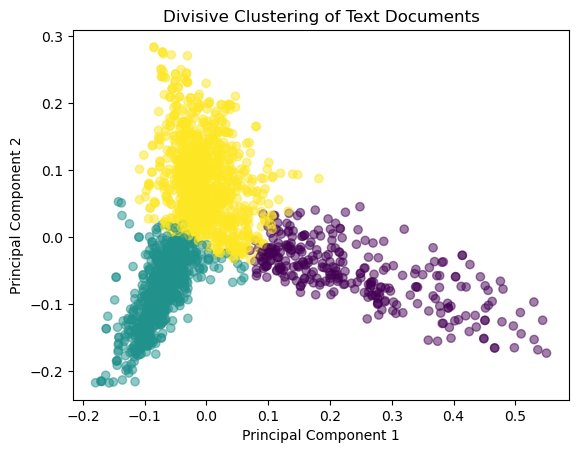

In [10]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.str.replace('[^a-zA-Z\s]', '').str.lower()
    text = text.apply(lambda x: x.split())
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    ps = PorterStemmer()
    text = text.apply(lambda x: [ps.stem(word) for word in x])
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df = pd.read_csv('bbc-text.csv', delimiter=',', encoding='latin-1')

df['text'] = preprocess_text(df['text'])

n_clusters = 3

# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Step 2: Apply K-Means clustering
kmeans_cluster = KMeans(n_clusters=n_clusters)
df['cluster'] = kmeans_cluster.fit_predict(X)

# Step 3: Visualize the clusters (optional)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
df['x'] = scatter_plot_points[:, 0]
df['y'] = scatter_plot_points[:, 1]

plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Divisive Clustering of Text Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
#
#Early_life_and_education
#Acting_career
#Early_work
#1980s
#1990s
#2000s
#2010s
#Other_ventures
#Six_Degrees_of_Kevin_Bacon
#Personal_life
#Accolades
#Awards_and_nominations
#Other_honors
#S

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def read_documents(file_paths):
    return [open(file_path, 'r').read() for file_path in file_paths]

def preprocess_document(document):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    tokens = nltk.word_tokenize(document.lower())  
    return [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]

def build_inv_index(documents):
    inv_index = {}
    for doc_idx, document in enumerate(documents, start=1):
        tokens = preprocess_document(document)
        for term in tokens:
            inv_index.setdefault(term, set()).add(f"Doc{doc_idx}")
    return inv_index

def print_inv_index(inv_index):
    for term, documents in inv_index.items():
        print(f"{term} -> {', '.join(documents)}")

file_path = 'file1.txt'
documents = read_documents([file_path])
inv_index = build_inv_index(documents)
print_inv_index(inv_index)

shell -> Doc1
sourc -> Doc1
radio -> Doc1
emiss -> Doc1
report -> Doc1
observ -> Doc1
made -> Doc1
mc -> Doc1
interferomet -> Doc1
mullard -> Doc1
astronomi -> Doc1
observatori -> Doc1
cambridg -> Doc1


In [14]:
import os
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_and_tokenize(document):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer.stem(re.sub(r'[^a-zA-Z0-9]', '', token)) for token in nltk.word_tokenize(document)]
    processed_tokens = [token for token in tokens if token.lower() not in stop_words and token]
    return ' '.join(processed_tokens)

folder_path = 'Documents'
file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(".txt")]
documents = []
document_names = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        documents.append(content)
        document_names.append(os.path.basename(file_path))

preprocessed_documents = [preprocess_and_tokenize(doc) for doc in documents]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

feature_names = vectorizer.get_feature_names_out()

for i, doc_name in enumerate(document_names):
    print(f"\nTF-IDF Vector for Document '{doc_name}':")
    for feature_index, tfidf_value in zip(tfidf_matrix[i].indices, tfidf_matrix[i].data):
        print(f"{feature_names[feature_index]}: {tfidf_value:.4f}")


TF-IDF Vector for Document '10.txt':
bindi: 0.1236
black: 0.1007
subtl: 0.1236
miss: 0.1119
nt: 0.1030
touch: 0.1184
final: 0.0856
gave: 0.0894
bun: 0.1236
low: 0.0477
middlepart: 0.1236
sleek: 0.1236
look: 0.1059
contrast: 0.1007
ad: 0.0758
dupatta: 0.1236
dye: 0.1184
tie: 0.1096
yellow: 0.1147
faabiiana: 0.1236
brand: 0.1184
end: 0.0732
scallop: 0.1236
necklin: 0.1236
mock: 0.1236
embellish: 0.1236
suit: 0.1059
silk: 0.1119
white: 0.0948
wore: 0.1236
rout: 0.1119
take: 0.0649
chose: 0.1236
diva: 0.1236
btown: 0.1236
home: 0.1119
mother: 0.1147
leav: 0.1076
seen: 0.0987
wa: 0.0536
onam: 0.1236
occas: 0.1910
auspici: 0.1236
magic: 0.1096
see: 0.0562
got: 0.1119
ethnic: 0.2472
western: 0.0978
shift: 0.0657
effortlessli: 0.1236
come: 0.0970
magician: 0.1236
true: 0.0790
fashion: 0.1119
world: 0.0761
trailblaz: 0.1236
arora: 0.1236
malaika: 0.3709
hue: 0.1236
live: 0.0955
slit: 0.0894
risqu: 0.1236
silhouett: 0.2472
versatil: 0.0987

TF-IDF Vector for Document '11.txt':
topic: 0.1189
cri

much: 0.2495
popul: 0.3355
rubi: 0.2764
invers: 0.2486
explain: 0.2103
reson: 0.1718
maser: 0.2086
peak: 0.2280
discuss: 0.1290
action: 0.2477
observ: 0.1353
centr: 0.2277
use: 0.1074
frequenc: 0.2324
pump: 0.5113
experiment: 0.1614
result: 0.1287

TF-IDF Vector for Document 'file_10511.txt':
particular: 0.1971
aerial: 0.2198
estim: 0.2130
wave: 0.1371
properti: 0.1852
parametr: 0.2113
commun: 0.2549
maser: 0.3995
comb: 0.3288
amplifi: 0.1353
applic: 0.1474
refer: 0.1868
rang: 0.1588
satellit: 0.1742
perform: 0.1886
discuss: 0.1235
travel: 0.2230
practic: 0.1942
frequenc: 0.1113
system: 0.2897
compar: 0.1718
structur: 0.2060

TF-IDF Vector for Document 'file_10512.txt':
triod: 0.1969
grid: 0.1873
uhf: 0.2298
tunabl: 0.4726
better: 0.2243
straight: 0.2395
figur: 0.1912
bandwidth: 0.1722
variabl: 0.1605
reactanc: 0.1969
nois: 0.1419
capacit: 0.1698
earth: 0.1446
amplifi: 0.3441
type: 0.1232
convent: 0.2050
rang: 0.2692
describ: 0.1042
frequenc: 0.0943
pump: 0.2075
obtain: 0.1168
experime

ne: 0.3415
afterglow: 0.3613
mixtur: 0.3319
ar: 0.3278
ambipolar: 0.3613
plasma: 0.1941
properti: 0.2059
ion: 0.2137
diffus: 0.2425
note: 0.2073
electron: 0.1365
microwav: 0.2007
neg: 0.2107
measur: 0.1469
influenc: 0.2288

TF-IDF Vector for Document 'file_11040.txt':
lifshitz: 0.2604
elsewher: 0.2198
ellipsoid: 0.2027
landau: 0.2099
insul: 0.1832
loss: 0.1302
second: 0.2743
ferromagnet: 0.1482
mix: 0.3729
form: 0.1140
detail: 0.1129
sampl: 0.1596
given: 0.1676
calcul: 0.1951
harmon: 0.4038
third: 0.1609
discuss: 0.0815
order: 0.1269
small: 0.1219
gener: 0.2813
frequenc: 0.1469
exampl: 0.1336
made: 0.0968
case: 0.1104
includ: 0.1168
simpl: 0.1195

TF-IDF Vector for Document 'file_11041.txt':
background: 0.3219
previou: 0.2787
rf: 0.2539
non: 0.2804
linear: 0.2066
extens: 0.2576
push: 0.2884
amplitud: 0.2099
nois: 0.1941
oscil: 0.5117
function: 0.1816
frequenc: 0.1291
includ: 0.2053
work: 0.2193

TF-IDF Vector for Document 'file_11042.txt':
indirect: 0.2927
english: 0.2621
exact: 0.4206

absorpt: 0.1378
occur: 0.1380
particl: 0.1394
solar: 0.2309
period: 0.1288
geomagnet: 0.1273
electron: 0.0902
measur: 0.0971
fifth: 0.2361
field: 0.1799
show: 0.1185
product: 0.1549
result: 0.0906

TF-IDF Vector for Document 'file_1264.txt':
extraterrestri: 0.2937
sixth: 0.3065
pioneer: 0.2937
magnetomet: 0.2840
toroid: 0.2612
equatori: 0.2339
plane: 0.1817
earth: 0.1644
current: 0.2879
magnet: 0.1178
explor: 0.2576
ring: 0.2407
system: 0.1396
consist: 0.1841
measur: 0.1273
characterist: 0.1429
fifth: 0.3096
field: 0.1180
flow: 0.2217

TF-IDF Vector for Document 'file_1265.txt':
thirteen: 0.2981
put: 0.2303
magnetoacoust: 0.2981
collisionless: 0.2981
interplanetari: 0.1969
pioneer: 0.2303
magnetomet: 0.2227
strength: 0.1619
sudden: 0.1813
preliminari: 0.1779
wave: 0.1036
suggest: 0.1428
boundari: 0.1773
activ: 0.1416
radii: 0.2116
form: 0.1305
earth: 0.2578
solar: 0.1187
magnet: 0.0924
experi: 0.1436
dure: 0.1231
may: 0.1265
fifth: 0.2428
field: 0.2775
increas: 0.1355
result: 0.0931

T

discrep: 0.3516
dipol: 0.2960
ray: 0.2509
equival: 0.2530
surfac: 0.2385
earth: 0.2170
cosmic: 0.2472
magnet: 0.1555
geomagnet: 0.2204
observ: 0.3295
investig: 0.1947
extern: 0.2861
deriv: 0.1879
field: 0.1557
base: 0.2053
also: 0.2049
see: 0.2280

TF-IDF Vector for Document 'file_18.txt':
background: 0.2368
smaller: 0.2243
butterworth: 0.2599
rectangular: 0.2016
tchebycheff: 0.2296
optimum: 0.3900
filter: 0.2966
ratio: 0.1718
nois: 0.2855
puls: 0.1381
shown: 0.1462
signal: 0.2779
detect: 0.1787
given: 0.1083
analysi: 0.1208
third: 0.2080
order: 0.1640
use: 0.0878
theoret: 0.1477
design: 0.1204
obtain: 0.1176
result: 0.1051
white: 0.2581

TF-IDF Vector for Document 'file_180.txt':
charg: 0.3399
varactor: 0.5877
surfac: 0.3498
space: 0.3412
layer: 0.3021
semiconductor: 0.4149
use: 0.1920

TF-IDF Vector for Document 'file_1800.txt':
rikitak: 0.5976
revers: 0.3627
earth: 0.2584
extend: 0.3138
calcul: 0.2240
magnet: 0.1851
use: 0.1559
comput: 0.2515
digit: 0.3005
field: 0.1855
made: 0.2223

suscept: 0.3838
diamagnet: 0.4318
metal: 0.2600
form: 0.2368
independ: 0.2926
calcul: 0.2027
electron: 0.1682
use: 0.1411
conduct: 0.2372
reason: 0.3542
field: 0.1678
made: 0.2012
part: 0.2359
simpl: 0.2483

TF-IDF Vector for Document 'file_2356.txt':
superconductor: 0.7750
imped: 0.1467
bulk: 0.2610
depend: 0.1449
describ: 0.0998
behaviour: 0.1811
frequenc: 0.2712
evalu: 0.1809
deriv: 0.1200
equat: 0.1285
field: 0.1989
temperatur: 0.1334
high: 0.2267

TF-IDF Vector for Document 'file_2357.txt':
swansea: 0.4762
sept: 0.4405
electr: 0.1980
physic: 0.2686
discharg: 0.2348
confer: 0.3455
held: 0.3126
report: 0.2195
societi: 0.3839

TF-IDF Vector for Document 'file_2358.txt':
emit: 0.5309
energi: 0.3581
total: 0.4590
electron: 0.2589
distribut: 0.3345
theoret: 0.3654
field: 0.2583

TF-IDF Vector for Document 'file_2359.txt':
emit: 0.5180
energi: 0.3494
total: 0.4478
electron: 0.2526
distribut: 0.3264
measur: 0.2720
field: 0.2520
experiment: 0.3182

TF-IDF Vector for Document 'file_236.txt'

flare: 0.1675
charg: 0.1394
proton: 0.1847
ray: 0.1509
suggest: 0.1446
latitud: 0.1509
zone: 0.1724
allen: 0.2046
van: 0.1936
intens: 0.1418
cosmic: 0.1488
larg: 0.2859
detect: 0.1604
particl: 0.1452
solar: 0.3607
magnet: 0.0935
radiat: 0.1232
altitud: 0.1716
satellit: 0.2667
three: 0.1313
august: 0.1894
observ: 0.0991
dure: 0.1247
associ: 0.1463
outsid: 0.2115
high: 0.1068
increas: 0.2744
due: 0.1349
low: 0.1165
occas: 0.2332

TF-IDF Vector for Document 'file_2895.txt':
magnetomet: 0.2279
inhomogen: 0.1976
polar: 0.1467
auror: 0.1543
wave: 0.1060
ray: 0.1525
latitud: 0.1525
locat: 0.1824
earth: 0.3957
space: 0.1414
cosmic: 0.1503
mean: 0.1324
phenomena: 0.1546
reflect: 0.1431
ionospher: 0.2144
radio: 0.1110
height: 0.1339
magnet: 0.2835
artifici: 0.1715
satellit: 0.2694
consid: 0.1218
great: 0.2027
use: 0.0796
investig: 0.2367
effect: 0.1974
distribut: 0.1226
field: 0.2840

TF-IDF Vector for Document 'file_2896.txt':
tabul: 0.2299
composit: 0.2578
km: 0.2184
earth: 0.1721
shown: 0.172

semivert: 0.2753
escap: 0.4533
nomogram: 0.2219
cone: 0.4164
corona: 0.3416
angl: 0.1510
propag: 0.1268
index: 0.3195
refract: 0.3157
radio: 0.1002
solar: 0.2193
govern: 0.1981
frequenc: 0.0777
give: 0.1223
critic: 0.1430

TF-IDF Vector for Document 'file_3352.txt':
spectroheliogram: 0.3462
hulbert: 0.3462
math: 0.3462
observatori: 0.2214
hundr: 0.2542
flare: 0.3842
radio: 0.1260
solar: 0.1379
mc: 0.2287
radiat: 0.2825
record: 0.1539
data: 0.1489
dure: 0.1429
frequenc: 0.0977
associ: 0.1677
sever: 0.1809
compar: 0.1507
studi: 0.1467
time: 0.1293
obtain: 0.1209

TF-IDF Vector for Document 'file_3353.txt':
analyz: 0.3177
overlap: 0.3350
swept: 0.3428
display: 0.2709
second: 0.2167
spectrum: 0.2189
appear: 0.2286
intens: 0.1932
film: 0.2300
rang: 0.1656
dynam: 0.2487
solar: 0.1638
band: 0.1747
three: 0.3577
frequenc: 0.1161
studi: 0.1744
time: 0.1537
result: 0.1285

TF-IDF Vector for Document 'file_3354.txt':
occupi: 0.1465
salient: 0.1670
hitherto: 0.1499
interferometri: 0.4556
eg: 0.122

itv: 0.3292
sync: 0.3154
hysteresi: 0.2209
divid: 0.3996
pair: 0.1969
rectangular: 0.1972
loop: 0.1822
stabl: 0.1809
core: 0.3434
divis: 0.2202
accur: 0.1983
rang: 0.1325
magnet: 0.2040
stage: 0.1625
gener: 0.1186
frequenc: 0.0929
singl: 0.1567
digit: 0.1656
obtain: 0.1150
made: 0.1225
ha: 0.1404
factor: 0.1618

TF-IDF Vector for Document 'file_3747.txt':
multistag: 0.3195
suggest: 0.2147
distort: 0.2436
synthesi: 0.5067
amplifi: 0.3075
circuit: 0.1337
type: 0.1652
mean: 0.1945
transient: 0.2409
mathemat: 0.2469
problem: 0.1999
analysi: 0.1609
describ: 0.1396
consid: 0.1790
system: 0.1645
differ: 0.1856
method: 0.1457
new: 0.1978

TF-IDF Vector for Document 'file_3748.txt':
uncondit: 0.2637
prevent: 0.2110
condit: 0.2398
suggest: 0.1361
feedback: 0.4040
stabl: 0.4683
suitabl: 0.1424
oscil: 0.1059
circuit: 0.1695
shown: 0.1235
occur: 0.1352
mathemat: 0.1565
practic: 0.1399
analys: 0.1342
system: 0.3129
greater: 0.1546
automat: 0.1636
method: 0.0924
design: 0.2033
obtain: 0.1985
experime

cure: 0.3054
mould: 0.3054
print: 0.4252
ink: 0.2864
composit: 0.2131
resistor: 0.5451
describ: 0.2050
process: 0.1602
effect: 0.1064
characterist: 0.1237
inject: 0.2404
prepar: 0.2368

TF-IDF Vector for Document 'file_4326.txt':
reset: 0.2358
prevent: 0.2193
thyratron: 0.2053
reactor: 0.2015
ground: 0.1605
enabl: 0.1884
radar: 0.1605
cathod: 0.1504
charg: 0.2728
parasit: 0.2432
satur: 0.1748
modul: 0.2835
core: 0.1540
circuit: 0.0881
puls: 0.3635
output: 0.1231
type: 0.1088
potenti: 0.1537
durat: 0.1683
given: 0.0950
mathemat: 0.1627
magnet: 0.0915
describ: 0.0920
discuss: 0.0924
achiev: 0.1647
oper: 0.1115
analys: 0.1395
gener: 0.1063
system: 0.1084
automat: 0.1701
seri: 0.1419
product: 0.1578

TF-IDF Vector for Document 'file_4327.txt':
multist: 0.8750
transistor: 0.3890
circuit: 0.2884

TF-IDF Vector for Document 'file_4328.txt':
proof: 0.4371
theorem: 0.3451
equival: 0.2950
pole: 0.3457
imped: 0.2678
network: 0.2387
element: 0.2651
type: 0.2156
onli: 0.2807
two: 0.3989

TF-IDF Vec

tha: 0.2582
astronom: 0.2052
royal: 0.2082
rippl: 0.2026
fade: 0.1649
inform: 0.1555
irregular: 0.3019
novemb: 0.1746
piec: 0.2195
import: 0.1559
simultan: 0.1469
speed: 0.1404
type: 0.0993
movement: 0.3174
briefli: 0.1559
produc: 0.1206
larg: 0.1276
lower: 0.1395
region: 0.1102
ionospher: 0.0947
scale: 0.3077
indic: 0.1107
discuss: 0.0844
travel: 0.1524
small: 0.1262
observ: 0.0885
measur: 0.0903
held: 0.1695
method: 0.0876
obtain: 0.0941
two: 0.0919
report: 0.1190
show: 0.1102
new: 0.1190
result: 0.0842
societi: 0.2082

TF-IDF Vector for Document 'file_4788.txt':
central: 0.1936
patch: 0.2404
horizont: 0.1671
half: 0.1605
daytim: 0.1835
direct: 0.2552
veloc: 0.1374
disturb: 0.1383
puls: 0.1168
speed: 0.1484
space: 0.1320
transmitt: 0.1752
movement: 0.5030
sporad: 0.3505
region: 0.1164
ioniz: 0.2394
onli: 0.1366
record: 0.2531
observ: 0.0935
use: 0.0743
system: 0.1045
differ: 0.1179
time: 0.1064
ha: 0.1214
mainli: 0.1892

TF-IDF Vector for Document 'file_4789.txt':
whithin: 0.3200
cal

ro: 0.3856
sodium: 0.3158
airglow: 0.2910
excit: 0.2124
rocket: 0.2144
layer: 0.3304
experi: 0.1939
altitud: 0.2288
describ: 0.1254
line: 0.3507
confirm: 0.2340
distribut: 0.1618
similar: 0.2075
measur: 0.1348
show: 0.1645
night: 0.2301
result: 0.1257

TF-IDF Vector for Document 'file_532.txt':
ghven: 0.4385
oscil: 0.3612
transistor: 0.1950
power: 0.1958
procedur: 0.2790
oper: 0.1830
frequenc: 0.1367
design: 0.3467
high: 0.1714
step: 0.5668

TF-IDF Vector for Document 'file_5320.txt':
alpha: 0.3515
balanc: 0.2501
conclud: 0.2830
import: 0.2337
ray: 0.4038
emiss: 0.3752
surfac: 0.1920
materi: 0.2106
earth: 0.1746
lower: 0.2090
determin: 0.1541
atmospher: 0.1702
ioniz: 0.1698
constitut: 0.2842
measur: 0.1353
factor: 0.1985

TF-IDF Vector for Document 'file_5321.txt':
owe: 0.1936
contain: 0.1307
magnetohydrodynam: 0.1822
anisotrop: 0.1626
convect: 0.4040
neutral: 0.1480
thermal: 0.1327
plasma: 0.1072
presenc: 0.1367
medium: 0.1332
electr: 0.0966
earth: 0.1048
approxim: 0.1111
molecul: 0.1

singapor: 0.3630
content: 0.2887
estim: 0.2380
unit: 0.2139
maximum: 0.2018
densiti: 0.1826
abov: 0.2215
layer: 0.3619
comparison: 0.2317
ioniz: 0.3706
total: 0.2431
electron: 0.1371
column: 0.2879
level: 0.2111
present: 0.1793

TF-IDF Vector for Document 'file_5717.txt':
choos: 0.2194
trough: 0.2032
huancayo: 0.1962
markedli: 0.1947
peculiar: 0.2128
sum: 0.1720
particular: 0.1259
relationship: 0.1702
slough: 0.1759
correspond: 0.1303
adjac: 0.1895
disturb: 0.2448
delay: 0.1302
movement: 0.1484
sporad: 0.1551
peak: 0.1395
layer: 0.2069
ionospher: 0.1772
featur: 0.1470
magnet: 0.0781
geomagnet: 0.2215
hour: 0.1484
investig: 0.0978
effect: 0.1631
season: 0.1421
differ: 0.1044
vertic: 0.1310
paramet: 0.2390
call: 0.1841
show: 0.1030
attent: 0.1714
variou: 0.1140
follow: 0.1310
day: 0.2637

TF-IDF Vector for Document 'file_5718.txt':
ceil: 0.3006
blanket: 0.2664
europ: 0.2575
cloud: 0.1821
africa: 0.2305
daytim: 0.1937
pronounc: 0.2260
exist: 0.1571
latitud: 0.1503
minimum: 0.1579
maximum:

marcoussi: 0.2480
mitra: 0.2304
shain: 0.2681
galact: 0.3708
qualit: 0.1969
attenu: 0.1536
april: 0.1785
recept: 0.1938
layer: 0.2297
ionospher: 0.1967
indic: 0.1150
analysi: 0.1005
radiat: 0.2284
partli: 0.4429
record: 0.1244
agre: 0.1722
use: 0.0730
frequenc: 0.1579
effect: 0.0905
may: 0.1187
measur: 0.0937
obtain: 0.0978
influenc: 0.1459
continu: 0.1435
due: 0.1250
result: 0.0874

TF-IDF Vector for Document 'file_6225.txt':
rainfal: 0.5668
attenu: 0.3351
inher: 0.4562
wavelength: 0.3133
radar: 0.3319
error: 0.3289
measur: 0.2045

TF-IDF Vector for Document 'file_6226.txt':
snow: 0.6660
radar: 0.4085
evid: 0.4322
gener: 0.2706
level: 0.3600

TF-IDF Vector for Document 'file_6227.txt':
distanc: 0.4067
transmiss: 0.3671
scatter: 0.3573
electr: 0.2916
atmospher: 0.3084
veri: 0.3623
frequenc: 0.2065
long: 0.3887
high: 0.2589

TF-IDF Vector for Document 'file_6228.txt':
ocean: 0.3072
pacif: 0.3144
pair: 0.2256
ray: 0.1886
latitud: 0.1886
electr: 0.1503
cosmic: 0.1859
ion: 0.1837
rate: 0.1

waveguid: 0.4108
charg: 0.3328
wave: 0.2505
space: 0.3341
propag: 0.3320
period: 0.3203
electron: 0.2242
tube: 0.3762
structur: 0.3762

TF-IDF Vector for Document 'file_6579.txt':
thzn: 0.4028
aid: 0.2912
stark: 0.3111
cell: 0.2484
less: 0.2213
spectroscopi: 0.2858
estim: 0.2174
modul: 0.1933
diagram: 0.2313
techniqu: 0.1806
coeffici: 0.1924
error: 0.2169
absorpt: 0.1914
microwav: 0.1842
describ: 0.1254
set: 0.2267
use: 0.1050
measur: 0.1349
method: 0.1309
experiment: 0.1578

TF-IDF Vector for Document 'file_658.txt':
meacham: 0.2737
thermistor: 0.4187
lamp: 0.2414
compens: 0.1778
second: 0.1593
bridg: 0.3561
ambient: 0.2303
crystal: 0.1457
sensit: 0.1755
tune: 0.3229
replac: 0.1954
transform: 0.1402
oscil: 0.1127
circuit: 0.1804
output: 0.1260
procedur: 0.1742
fluctuat: 0.1588
describ: 0.0942
use: 0.0789
stabil: 0.1327
method: 0.0983
input: 0.1335
temperatur: 0.1259
thi: 0.1161
ad: 0.1853

TF-IDF Vector for Document 'file_6580.txt':
xy: 0.2866
electrifi: 0.2795
trajectori: 0.2130
coor

new: 0.1291
present: 0.1189

TF-IDF Vector for Document 'file_712.txt':
paramagnet: 0.4536
relax: 0.4212
interact: 0.3801
time: 0.2737
exchang: 0.5015
influenc: 0.3820

TF-IDF Vector for Document 'file_7120.txt':
neoc: 0.4447
schroding: 0.3941
coulomb: 0.3342
motion: 0.2288
electr: 0.1772
uniform: 0.2535
refer: 0.2105
magnet: 0.1378
electron: 0.1383
finit: 0.2699
special: 0.2305
system: 0.1633
equat: 0.1784
solut: 0.2102
field: 0.2760

TF-IDF Vector for Document 'file_7121.txt':
strong: 0.3167
februari: 0.3367
motion: 0.2804
gaseou: 0.3833
version: 0.3939
electr: 0.2171
amplifi: 0.1869
extend: 0.2861
ion: 0.2654
note: 0.2574
field: 0.1691
paper: 0.2766

TF-IDF Vector for Document 'file_7122.txt':
perfectli: 0.2382
coaxial: 0.2084
electrod: 0.2033
mix: 0.2500
boundari: 0.2077
solv: 0.1982
current: 0.2644
approxim: 0.1600
disk: 0.1996
valu: 0.1379
problem: 0.1557
cylind: 0.4191
right: 0.2524
circular: 0.2049
conduct: 0.1531
flow: 0.4072
one: 0.1474
end: 0.2066

TF-IDF Vector for Document

elucid: 0.2348
overvoltag: 0.2505
spark: 0.1982
lag: 0.3830
growth: 0.1951
gase: 0.1605
correspond: 0.1395
form: 0.2363
electr: 0.1075
current: 0.1022
static: 0.1641
uniform: 0.1538
potenti: 0.1404
depend: 0.1220
rate: 0.1326
curv: 0.1265
breakdown: 0.3314
given: 0.0868
ioniz: 0.2268
process: 0.1313
oper: 0.1019
use: 0.0704
investig: 0.1047
secondari: 0.1513
mechan: 0.1248
exampl: 0.1385
theoret: 0.1185
greater: 0.1468
time: 0.3025
field: 0.0837
show: 0.1103

TF-IDF Vector for Document 'file_7599.txt':
pancak: 0.2986
cro: 0.2245
neon: 0.2181
gase: 0.1776
guid: 0.2045
rf: 0.3314
insert: 0.1861
rel: 0.1570
waveguid: 0.1702
mm: 0.1919
fill: 0.2060
dc: 0.1541
power: 0.1207
techniqu: 0.1339
height: 0.1310
discharg: 0.2822
variat: 0.1099
experi: 0.1439
microwav: 0.1366
intern: 0.1679
observ: 0.0981
use: 0.0779
frequenc: 0.0843
tube: 0.3118
studi: 0.1266
field: 0.0927
made: 0.1111
posit: 0.1404
variou: 0.1351
due: 0.1334
wa: 0.1295

TF-IDF Vector for Document 'file_76.txt':
sweep: 0.2604
radi

bistabl: 0.3007
gate: 0.2903
valv: 0.1015
direct: 0.0988
passag: 0.2912
beam: 0.1062
togeth: 0.1330
basic: 0.2348
store: 0.1365
form: 0.0965
diod: 0.1032
unit: 0.1069
element: 0.4993
function: 0.0875
three: 0.0958
deflect: 0.1514
system: 0.0809
comput: 0.0928
digit: 0.4433
design: 0.0789
two: 0.0751
control: 0.1924
ha: 0.0940
includ: 0.0989
also: 0.0900
see: 0.1001

TF-IDF Vector for Document 'file_8104.txt':
graffund: 0.4079
briner: 0.4079
dec: 0.3786
geometr: 0.2755
correct: 0.2255
extens: 0.2297
diagram: 0.2342
imped: 0.1867
transform: 0.1891
earlier: 0.2278
gener: 0.1469
paper: 0.2071
case: 0.1729
work: 0.1955
see: 0.1854

TF-IDF Vector for Document 'file_8105.txt':
bayer: 0.3270
krumhansl: 0.3270
barkhausen: 0.5795
sawtooth: 0.2428
sinusoid: 0.2020
waveform: 0.1851
nois: 0.2774
core: 0.1705
excit: 0.1726
rather: 0.2215
calcul: 0.1225
consid: 0.1306
use: 0.0853
cylindr: 0.1859
simplifi: 0.1895
method: 0.1063
field: 0.1015

TF-IDF Vector for Document 'file_8106.txt':
warham: 0.2163


retard: 0.1860
growth: 0.1895
geometri: 0.1852
appreci: 0.1775
parallel: 0.1266
taken: 0.1578
distanc: 0.1456
plane: 0.1252
charg: 0.1210
electrod: 0.1526
avalanch: 0.5909
constant: 0.2324
vari: 0.1281
form: 0.1147
space: 0.1215
ion: 0.1276
potenti: 0.1364
coeffici: 0.1252
calcul: 0.1964
develop: 0.1128
ioniz: 0.1101
total: 0.1445
electron: 0.0815
travel: 0.1481
consid: 0.1047
effect: 0.0848
multipl: 0.1509
assum: 0.1345
time: 0.0979
field: 0.0813
posit: 0.1232
show: 0.1071
case: 0.1111
present: 0.1066
also: 0.1070

TF-IDF Vector for Document 'file_8598.txt':
phenomenolog: 0.2148
stop: 0.1957
particular: 0.1331
passag: 0.1761
polar: 0.1282
disturb: 0.1294
valid: 0.1708
plasma: 0.3536
charg: 0.3693
dispers: 0.1597
examin: 0.1282
approach: 0.3154
produc: 0.1192
densiti: 0.1104
determin: 0.1017
particl: 0.3846
analysi: 0.0957
discuss: 0.0834
creat: 0.2091
behaviour: 0.1507
use: 0.0695
effect: 0.0862
extern: 0.1519
point: 0.1254
field: 0.0827
made: 0.0991
incid: 0.1357
move: 0.1507
respons

servo: 0.2407
lock: 0.2671
second: 0.2016
veloc: 0.1846
motor: 0.2811
feedback: 0.3629
variabl: 0.1837
speed: 0.1994
dc: 0.1975
type: 0.1410
phase: 0.1631
describ: 0.1192
employ: 0.2514
system: 0.4215
design: 0.1369
two: 0.1305
first: 0.1953
continu: 0.1962
control: 0.1671
simpl: 0.1757

TF-IDF Vector for Document 'file_9162.txt':
multitap: 0.2866
transduc: 0.2056
su: 0.2708
potentiomet: 0.4394
compens: 0.1758
load: 0.3105
enabl: 0.1908
linear: 0.1351
specifi: 0.1970
resist: 0.3963
shunt: 0.1954
requir: 0.1456
minimum: 0.1571
accur: 0.1802
independ: 0.1619
error: 0.1611
given: 0.0963
calcul: 0.1121
valu: 0.1182
method: 0.0973
input: 0.1321

TF-IDF Vector for Document 'file_9163.txt':
spacer: 0.3005
durabl: 0.2879
ferroxcub: 0.2448
glass: 0.2259
bond: 0.2504
transduc: 0.2065
wear: 0.2879
resolut: 0.1963
construct: 0.1527
ratio: 0.1534
nois: 0.1275
ferrit: 0.1697
resist: 0.1327
type: 0.1107
signal: 0.1241
improv: 0.1585
magnet: 0.0931
describ: 0.0936
record: 0.1336
employ: 0.1974
head: 0

auxiliari: 0.2611
packag: 0.3092
tunabl: 0.5176
combin: 0.1986
circul: 0.2588
maser: 0.3709
bandwidth: 0.1887
gain: 0.1737
voltag: 0.1444
unit: 0.1777
equip: 0.1836
band: 0.3111
oper: 0.1383
system: 0.1345
product: 0.1958

TF-IDF Vector for Document 'file_9650.txt':
background: 0.2415
prior: 0.2826
rf: 0.1905
direct: 0.1538
arriv: 0.2507
spectromet: 0.2211
properti: 0.1611
activ: 0.1630
nois: 0.1456
knowledg: 0.2447
signal: 0.2834
improv: 0.1810
ionospher: 0.2412
sound: 0.2071
echo: 0.3364
phase: 0.1462
period: 0.1525
record: 0.1525
shape: 0.1859
use: 0.0895
frequenc: 0.0968
may: 0.1456
select: 0.1965
method: 0.1116
high: 0.1214
part: 0.1497

TF-IDF Vector for Document 'file_9651.txt':
ionosond: 0.2112
vhf: 0.3744
relationship: 0.1846
auror: 0.2766
forward: 0.1846
scatter: 0.2670
zone: 0.3122
shown: 0.1188
diffus: 0.1512
layer: 0.1122
absorpt: 0.2599
rang: 0.1101
echo: 0.2680
height: 0.3599
indic: 0.1123
relat: 0.1092
diurnal: 0.1423
frequenc: 0.0771
season: 0.1541
characterist: 0.1028

In [6]:
import os
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

def preprocessing(document):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer.stem(re.sub(r'[^a-zA-Z0-9]', '', token)) for token in nltk.word_tokenize(document)]
    processed_tokens = [token for token in tokens if token.lower() not in stop_words and token]
    return ' '.join(processed_tokens)

def cosine_similarity(query, tfidf_matrix):
    query_vector = vectorizer.transform([preprocessing(query)])
    similarity_scores = sklearn_cosine_similarity(query_vector, tfidf_matrix)
    return similarity_scores[0]

folder_path = 'Documents'
file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(".txt")]
documents = []
document_names = []

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        documents.append(content)
        document_names.append(os.path.basename(file_path))

preprocessed_documents = [preprocessing(doc) for doc in documents]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

query = "temperature"

similarity_scores = cosine_similarity(query, tfidf_matrix)

for doc_name, score in zip(document_names, similarity_scores):
    print(f"{doc_name}: {score:.4f}")

10.txt: 0.0000
11.txt: 0.0000
12.txt: 0.0000
13.txt: 0.0000
14.txt: 0.1231
15.txt: 0.0000
2.txt: 0.0000
3.txt: 0.0000
4.txt: 0.0000
5.txt: 0.0000
6.txt: 0.0000
7.txt: 0.0000
8.txt: 0.0000
9.txt: 0.0000
